# **Universidad Pontificia Bolivariana**
Facultad de ingenierías. \
Ingeniería en Sistemas e Informática.\
Curso de Inteligencia Artificial.\
Periodo 202520.

# Examen No. 3 - REGRESIÓN
Dataset: Resistencia a la compresión del hormigón \
Comparación de algoritmos: \
LinearRegression \
Random Forest \
Support Vector Regression (SVR)


In [23]:
# ==================================================================================
# IMPORTACIÓN DE LIBRERÍAS
# ==================================================================================

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import time
from math import pi

print("Librerías importadas exitosamente!")
print("Versiones principales:")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Sklearn: {sk.__version__}")
print(f"Matplotlib: {mpl.__version__}")


Librerías importadas exitosamente!
Versiones principales:
Pandas: 2.2.2
NumPy: 2.0.2
Seaborn: 0.13.2
Sklearn: 1.6.1
Matplotlib: 3.10.0


In [14]:
# ==================================================================================
# ACCIÓN No. 1: CARGA Y EXPLORACIÓN INICIAL
# ==================================================================================

print("\n📊 Acción No. 1: Carga y Exploración inicial")
print("-" * 60)

# Cargar dataset de resistencia del hormigón desde UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
df_concrete = pd.read_excel(url)

# Renombrar columnas para mayor claridad
column_names = [
    'cement', 'blast_furnace_slag', 'fly_ash', 'water',
    'superplasticizer', 'coarse_aggregate', 'fine_aggregate',
    'age', 'compressive_strength'
]
df_concrete.columns = column_names

# 🔧 CORRECCIÓN DE TIPOS DE DATOS
print("\n=== CORRECCIÓN DE TIPOS DE DATOS ===")
print("ANTES:")
print(df_concrete.dtypes)

# Convertir todas las columnas numéricas a float64 para consistencia
numeric_cols = df_concrete.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    df_concrete[col] = df_concrete[col].astype('float64')

print("\nDESPUÉS:")
print(df_concrete.dtypes)
print(f"✅ Todos los tipos son consistentes: {all(df_concrete.dtypes == 'float64')}")

print("\n=== INFORMACIÓN DEL DATASET RESISTENCIA DEL HORMIGÓN ===")
print(f"Forma del dataset: {df_concrete.shape}")
print(f"Características: {list(df_concrete.columns[:-1])}")
print(f"Variable objetivo: {df_concrete.columns[-1]}")


📊 Acción No. 1: Carga y Exploración inicial
------------------------------------------------------------

=== CORRECCIÓN DE TIPOS DE DATOS ===
ANTES:
cement                  float64
blast_furnace_slag      float64
fly_ash                 float64
water                   float64
superplasticizer        float64
coarse_aggregate        float64
fine_aggregate          float64
age                       int64
compressive_strength    float64
dtype: object

DESPUÉS:
cement                  float64
blast_furnace_slag      float64
fly_ash                 float64
water                   float64
superplasticizer        float64
coarse_aggregate        float64
fine_aggregate          float64
age                     float64
compressive_strength    float64
dtype: object
✅ Todos los tipos son consistentes: True

=== INFORMACIÓN DEL DATASET RESISTENCIA DEL HORMIGÓN ===
Forma del dataset: (1030, 9)
Características: ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate


📊 Acción No. 2: Análisis Exploratorio de Datos (EDA)
------------------------------------------------------------


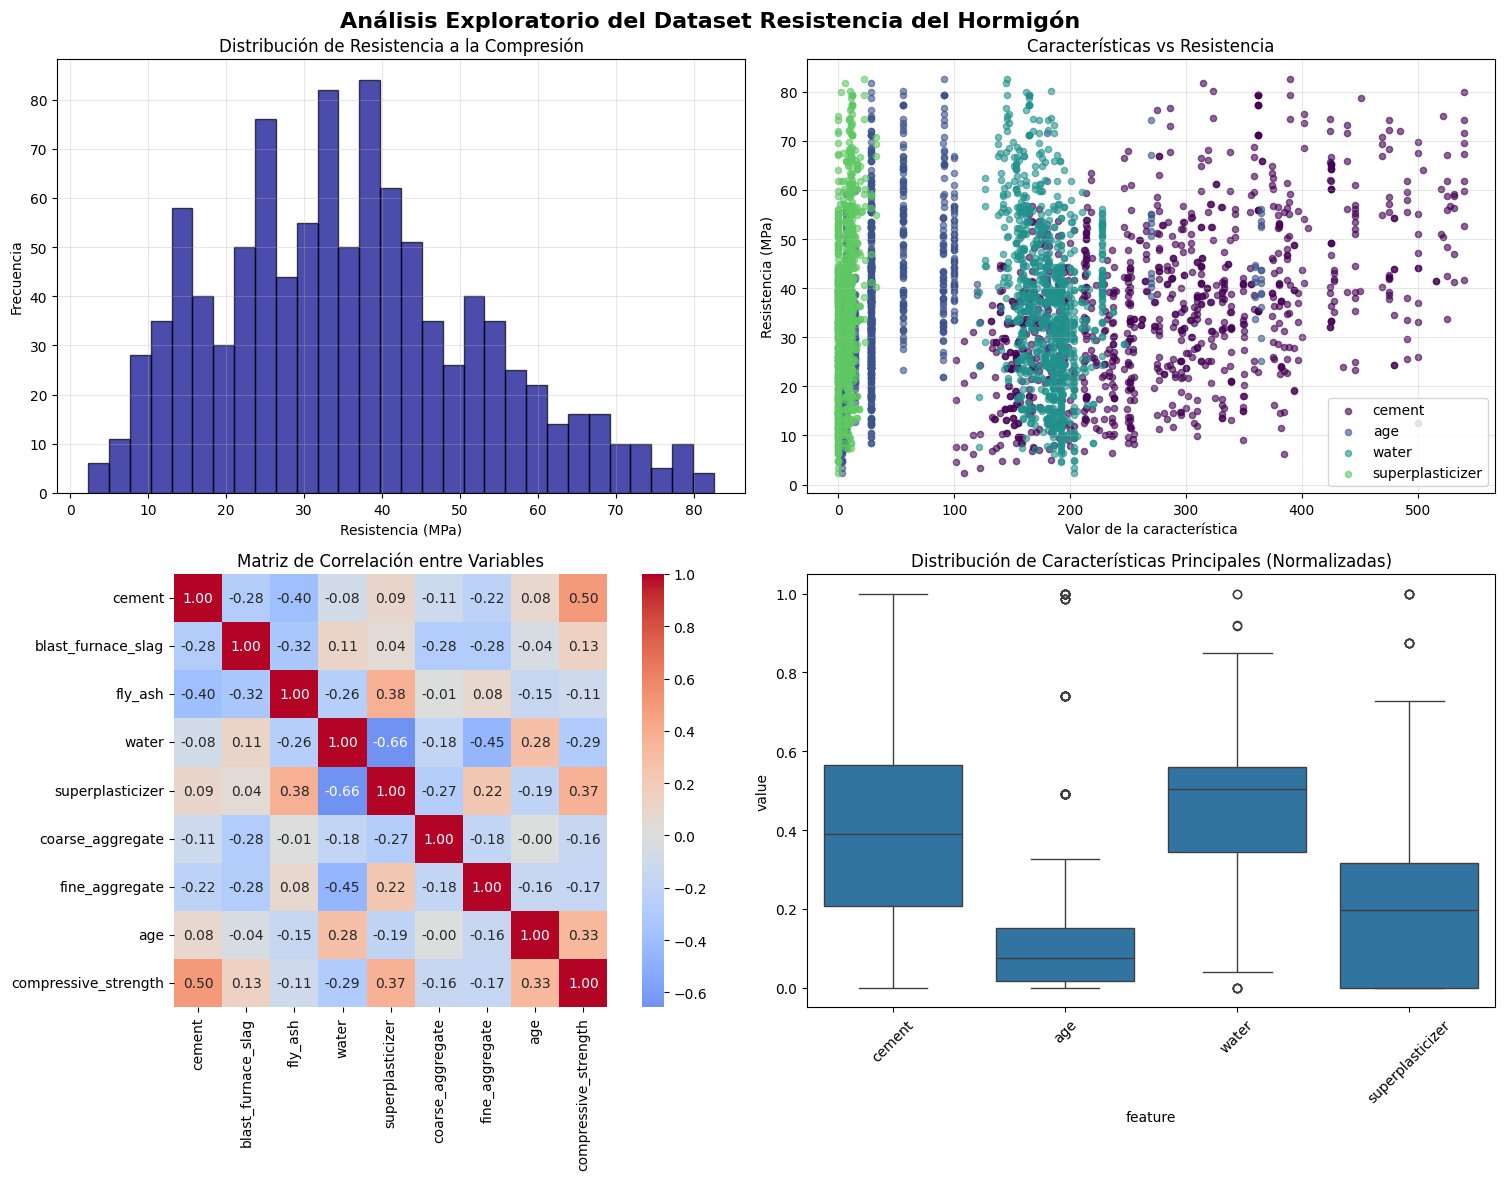


=== OBSERVACIONES CLAVE ===
• Dataset sin valores faltantes
• 8 características fisicoquímicas del hormigón
• Resistencia varía entre 2.33 y 82.60 MPa
• Cemento y edad muestran correlación positiva con resistencia
• Agua podría tener correlación negativa
• Distribución de resistencia parece aproximadamente normal


In [15]:
# ==================================================================================
# ACCIÓN No. 2: ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# ==================================================================================

print("\n📊 Acción No. 2: Análisis Exploratorio de Datos (EDA)")
print("-" * 60)

# Crear figura con subplots para EDA
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis Exploratorio del Dataset Resistencia del Hormigón', fontsize=16, fontweight='bold')

# 1. Distribución de la resistencia a la compresión
axes[0,0].hist(df_concrete['compressive_strength'], bins=30, color='darkblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Distribución de Resistencia a la Compresión')
axes[0,0].set_xlabel('Resistencia (MPa)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].grid(True, alpha=0.3)

# 2. Correlación entre características principales y resistencia
features_importantes = ['cement', 'age', 'water', 'superplasticizer']
for i, feature in enumerate(features_importantes):
    color = plt.cm.viridis(i / len(features_importantes))
    axes[0,1].scatter(df_concrete[feature], df_concrete['compressive_strength'],
                     alpha=0.6, label=feature, color=color, s=20)

axes[0,1].set_title('Características vs Resistencia')
axes[0,1].set_xlabel('Valor de la característica')
axes[0,1].set_ylabel('Resistencia (MPa)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Matriz de correlación
correlation_matrix = df_concrete.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            center=0, square=True, ax=axes[1,0], fmt='.2f')
axes[1,0].set_title('Matriz de Correlación entre Variables')

# 4. Boxplot de características normalizadas
# Normalizar datos para visualización
df_normalized = df_concrete.copy()
for col in df_concrete.columns[:-1]:
    df_normalized[col] = (df_concrete[col] - df_concrete[col].min()) / (df_concrete[col].max() - df_concrete[col].min())

df_melted = df_normalized[features_importantes].melt(var_name='feature', value_name='value')
sns.boxplot(data=df_melted, x='feature', y='value', ax=axes[1,1])
axes[1,1].set_title('Distribución de Características Principales (Normalizadas)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n=== OBSERVACIONES CLAVE ===")
print("• Dataset sin valores faltantes")
print("• 8 características fisicoquímicas del hormigón")
print("• Resistencia varía entre 2.33 y 82.60 MPa")
print("• Cemento y edad muestran correlación positiva con resistencia")
print("• Agua podría tener correlación negativa")
print("• Distribución de resistencia parece aproximadamente normal")


In [16]:
# ==================================================================================
# ACCIÓN No. 3: PREPROCESAMIENTO DE DATOS
# ==================================================================================

print("\n⚙️ Acción No. 3: Preprocesamiento de datos")
print("-" * 60)

# Separar características (X) y variable objetivo (y)
X = df_concrete.drop('compressive_strength', axis=1)
y = df_concrete['compressive_strength']

print("=== PREPARACIÓN DE DATOS ===")
print(f"Forma de X (características): {X.shape}")
print(f"Forma de y (objetivo): {y.shape}")

# División train/test con semilla fija para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # 30% para test, 70% para entrenamiento
    random_state=42  # Semilla fija para reproducibilidad
)

print(f"\n=== DIVISIÓN TRAIN/TEST ===")
print(f"Datos de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Datos de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

# Estadísticas de la variable objetivo
print(f"\n=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===")
print("Entrenamiento:")
print(f"  Media: {y_train.mean():.2f} MPa")
print(f"  Desviación estándar: {y_train.std():.2f} MPa")
print(f"  Rango: [{y_train.min():.2f}, {y_train.max():.2f}] MPa")

print("Prueba:")
print(f"  Media: {y_test.mean():.2f} MPa")
print(f"  Desviación estándar: {y_test.std():.2f} MPa")
print(f"  Rango: [{y_test.min():.2f}, {y_test.max():.2f}] MPa")

# Estandarización de características (importante para SVR y LinearRegression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== ESTANDARIZACIÓN ===")
print("✓ Características estandarizadas para SVR y Linear Regression")
print(f"Media características entrenamiento (después): {np.mean(X_train_scaled, axis=0)[:3].round(4)}")
print(f"Desviación estándar entrenamiento (después): {np.std(X_train_scaled, axis=0)[:3].round(4)}")

print("\n✓ Datos preparados y divididos correctamente")


⚙️ Acción No. 3: Preprocesamiento de datos
------------------------------------------------------------
=== PREPARACIÓN DE DATOS ===
Forma de X (características): (1030, 8)
Forma de y (objetivo): (1030,)

=== DIVISIÓN TRAIN/TEST ===
Datos de entrenamiento: 721 muestras (70.0%)
Datos de prueba: 309 muestras (30.0%)

=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO ===
Entrenamiento:
  Media: 36.15 MPa
  Desviación estándar: 16.80 MPa
  Rango: [2.33, 82.60] MPa
Prueba:
  Media: 35.04 MPa
  Desviación estándar: 16.48 MPa
  Rango: [4.57, 81.75] MPa

=== ESTANDARIZACIÓN ===
✓ Características estandarizadas para SVR y Linear Regression
Media características entrenamiento (después): [-0. -0.  0.]
Desviación estándar entrenamiento (después): [1. 1. 1.]

✓ Datos preparados y divididos correctamente


In [17]:
# ==================================================================================
# ACCIÓN No. 4: IMPLEMENTACIÓN Y ENTRENAMIENTO DE MODELOS
# ==================================================================================

print("\n🤖 Acción No. 4: Implementación y Entrenamiento de Modelos")
print("-" * 60)

# Diccionario para almacenar modelos y métricas
models = {}
training_times = {}
predictions = {}

print("=== ENTRENAMIENTO DE ALGORITMOS ===")

# 1. REGRESIÓN LINEAL
print("\n1. Entrenando Regresión Lineal...")
start_time = time.time()
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
training_times['Linear Regression'] = time.time() - start_time
models['Linear Regression'] = lr_model
predictions['Linear Regression'] = lr_model.predict(X_test_scaled)
print(f"  ✓ Completado en {training_times['Linear Regression']:.4f} segundos")

# 2. SUPPORT VECTOR REGRESSION
print("\n2. Entrenando Support Vector Regression...")
start_time = time.time()
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)
training_times['SVR'] = time.time() - start_time
models['SVR'] = svr_model
predictions['SVR'] = svr_model.predict(X_test_scaled)
print(f"  ✓ Completado en {training_times['SVR']:.4f} segundos")

# 3. RANDOM FOREST
print("\n3. Entrenando Random Forest...")
start_time = time.time()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest no necesita estandarización
training_times['Random Forest'] = time.time() - start_time
models['Random Forest'] = rf_model
predictions['Random Forest'] = rf_model.predict(X_test)
print(f"  ✓ Completado en {training_times['Random Forest']:.4f} segundos")

print("\n=== RESUMEN DE ENTRENAMIENTO ===")
for model_name, train_time in training_times.items():
    print(f"{model_name:20}: {train_time:.4f} segundos")

print("\n✓ Todos los modelos han sido entrenados exitosamente")
print(f"✓ Predicciones generadas para {X_test.shape[0]} muestras de prueba")


🤖 Acción No. 4: Implementación y Entrenamiento de Modelos
------------------------------------------------------------
=== ENTRENAMIENTO DE ALGORITMOS ===

1. Entrenando Regresión Lineal...
  ✓ Completado en 0.0024 segundos

2. Entrenando Support Vector Regression...
  ✓ Completado en 0.0982 segundos

3. Entrenando Random Forest...
  ✓ Completado en 0.5214 segundos

=== RESUMEN DE ENTRENAMIENTO ===
Linear Regression   : 0.0024 segundos
SVR                 : 0.0982 segundos
Random Forest       : 0.5214 segundos

✓ Todos los modelos han sido entrenados exitosamente
✓ Predicciones generadas para 309 muestras de prueba


In [18]:
# ==================================================================================
# ACCIÓN No. 5: EVALUACIÓN DE MÉTRICAS
# ==================================================================================

print("\n📈 Acción No. 5: Evaluación de Métricas")
print("-" * 60)

print("=== EVALUACIÓN DE RENDIMIENTO ===")

# Diccionarios para almacenar métricas de regresión
mae_scores = {}
mse_scores = {}
rmse_scores = {}
r2_scores = {}

# Calcular métricas para cada modelo
for model_name in models.keys():
    if model_name == 'Random Forest':
        y_pred = predictions[model_name]
    else:
        # Para modelos que usan datos escalados
        if model_name == 'Linear Regression':
            y_pred = models[model_name].predict(X_test_scaled)
        elif model_name == 'SVR':
            y_pred = models[model_name].predict(X_test_scaled)
        else:
            y_pred = predictions[model_name]

    predictions[model_name] = y_pred

    # Métricas de regresión
    mae_scores[model_name] = mean_absolute_error(y_test, y_pred)
    mse_scores[model_name] = mean_squared_error(y_test, y_pred)
    rmse_scores[model_name] = np.sqrt(mse_scores[model_name])
    r2_scores[model_name] = r2_score(y_test, y_pred)

    print(f"\n--- {model_name.upper()} ---")
    print(f"MAE (Mean Absolute Error): {mae_scores[model_name]:.4f}")
    print(f"MSE (Mean Squared Error): {mse_scores[model_name]:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse_scores[model_name]:.4f}")
    print(f"R² Score: {r2_scores[model_name]:.4f}")

# Crear tabla comparativa
print("\n" + "="*70)
print("TABLA COMPARATIVA DE MÉTRICAS")
print("="*70)

comparison_df = pd.DataFrame({
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores,
    'R2_Score': r2_scores,
    'Training Time (s)': training_times
})

# Ordenar por R² score descendente (mejor métrica para regresión)
comparison_df = comparison_df.sort_values('R2_Score', ascending=False)
print(comparison_df.round(4))

# Identificar el mejor modelo por cada métrica
print("\n" + "="*70)
print("MEJORES MODELOS POR MÉTRICA")
print("="*70)
print(f"Mejor R² Score: {comparison_df['R2_Score'].idxmax()} ({comparison_df['R2_Score'].max():.4f})")
print(f"Menor MAE: {comparison_df['MAE'].idxmin()} ({comparison_df['MAE'].min():.4f})")
print(f"Menor MSE: {comparison_df['MSE'].idxmin()} ({comparison_df['MSE'].min():.4f})")
print(f"Menor RMSE: {comparison_df['RMSE'].idxmin()} ({comparison_df['RMSE'].min():.4f})")
print(f"Más rápido: {comparison_df['Training Time (s)'].idxmin()} ({comparison_df['Training Time (s)'].min():.4f}s)")


📈 Acción No. 5: Evaluación de Métricas
------------------------------------------------------------
=== EVALUACIÓN DE RENDIMIENTO ===

--- LINEAR REGRESSION ---
MAE (Mean Absolute Error): 8.2986
MSE (Mean Squared Error): 109.7561
RMSE (Root Mean Squared Error): 10.4765
R² Score: 0.5944

--- SVR ---
MAE (Mean Absolute Error): 4.4799
MSE (Mean Squared Error): 41.2444
RMSE (Root Mean Squared Error): 6.4222
R² Score: 0.8476

--- RANDOM FOREST ---
MAE (Mean Absolute Error): 3.7361
MSE (Mean Squared Error): 29.3682
RMSE (Root Mean Squared Error): 5.4192
R² Score: 0.8915

TABLA COMPARATIVA DE MÉTRICAS
                      MAE       MSE     RMSE  R2_Score  Training Time (s)
Random Forest      3.7361   29.3682   5.4192    0.8915             0.5214
SVR                4.4799   41.2444   6.4222    0.8476             0.0982
Linear Regression  8.2986  109.7561  10.4765    0.5944             0.0024

MEJORES MODELOS POR MÉTRICA
Mejor R² Score: Random Forest (0.8915)
Menor MAE: Random Forest (3.7361)


📊 Acción No. 6: Predicciones vs Valores Reales
------------------------------------------------------------
=== GRÁFICOS DE PREDICCIONES VS VALORES REALES ===


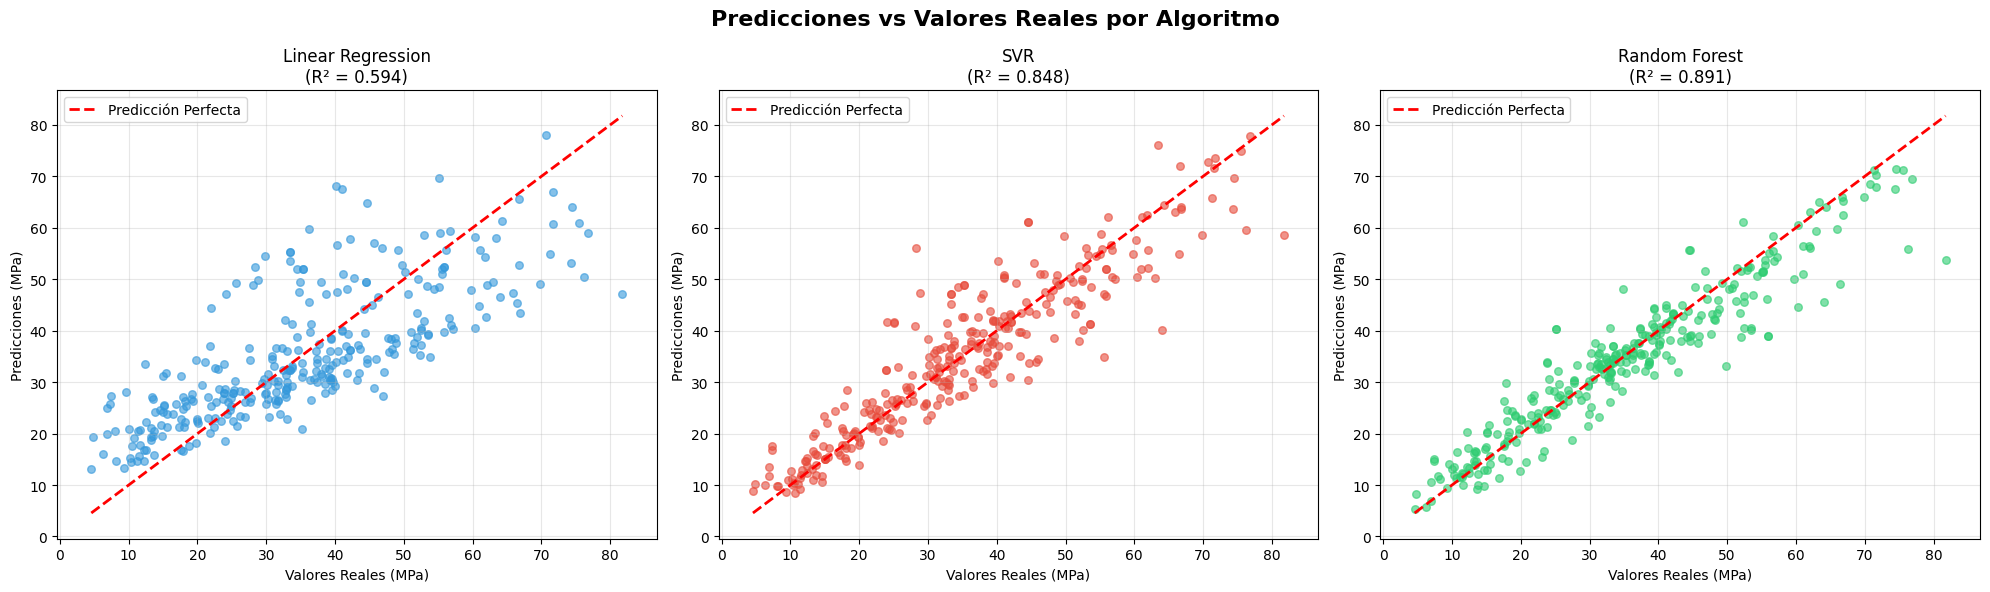


=== ANÁLISIS DE RESIDUOS ===


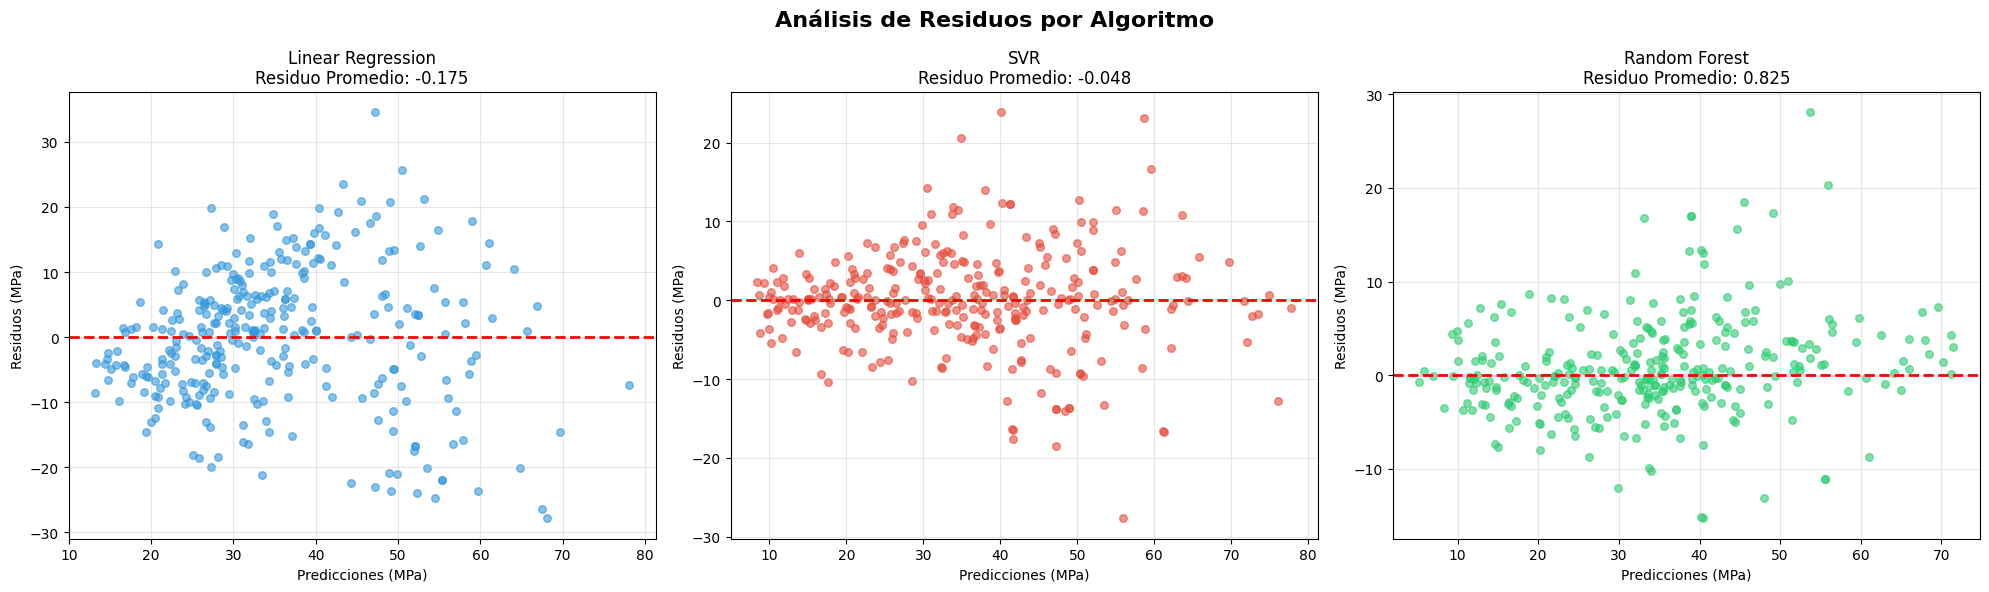

In [19]:
# ==================================================================================
# ACCIÓN No. 6: VISUALIZACIÓN DE RESULTADOS - PREDICCIONES VS REALES
# ==================================================================================

print("\n📊 Acción No. 6: Predicciones vs Valores Reales")
print("-" * 60)

print("=== GRÁFICOS DE PREDICCIONES VS VALORES REALES ===")

# Crear subplots para los gráficos de dispersión
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Predicciones vs Valores Reales por Algoritmo', fontsize=16, fontweight='bold')

# Colores para cada modelo
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Azul, Rojo, Verde

# Calcular límites para los ejes
min_val = min(y_test.min(), min([pred.min() for pred in predictions.values()]))
max_val = max(y_test.max(), max([pred.max() for pred in predictions.values()]))

for idx, (model_name, color) in enumerate(zip(models.keys(), colors)):
    # Crear gráfico de dispersión
    axes[idx].scatter(y_test, predictions[model_name],
                     alpha=0.6, color=color, s=30)

    # Línea de predicción perfecta (y = x)
    axes[idx].plot([min_val, max_val], [min_val, max_val],
                   'r--', linewidth=2, label='Predicción Perfecta')

    axes[idx].set_xlabel('Valores Reales (MPa)')
    axes[idx].set_ylabel('Predicciones (MPa)')
    axes[idx].set_title(f'{model_name}\n(R² = {r2_scores[model_name]:.3f})')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

    # Establecer misma escala para todos los gráficos
    axes[idx].set_xlim(min_val-5, max_val+5)
    axes[idx].set_ylim(min_val-5, max_val+5)

plt.tight_layout()
plt.show()

# Análisis de residuos
print("\n=== ANÁLISIS DE RESIDUOS ===")

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Análisis de Residuos por Algoritmo', fontsize=16, fontweight='bold')

for idx, (model_name, color) in enumerate(zip(models.keys(), colors)):
    residuals = y_test - predictions[model_name]

    # Gráfico de residuos vs predicciones
    axes[idx].scatter(predictions[model_name], residuals,
                     alpha=0.6, color=color, s=30)
    axes[idx].axhline(y=0, color='r', linestyle='--', linewidth=2)
    axes[idx].set_xlabel('Predicciones (MPa)')
    axes[idx].set_ylabel('Residuos (MPa)')
    axes[idx].set_title(f'{model_name}\nResiduo Promedio: {residuals.mean():.3f}')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


📊 Acción No. 7: Comparativos Gráficos
------------------------------------------------------------
=== VISUALIZACIÓN COMPARATIVA DE MÉTRICAS ===


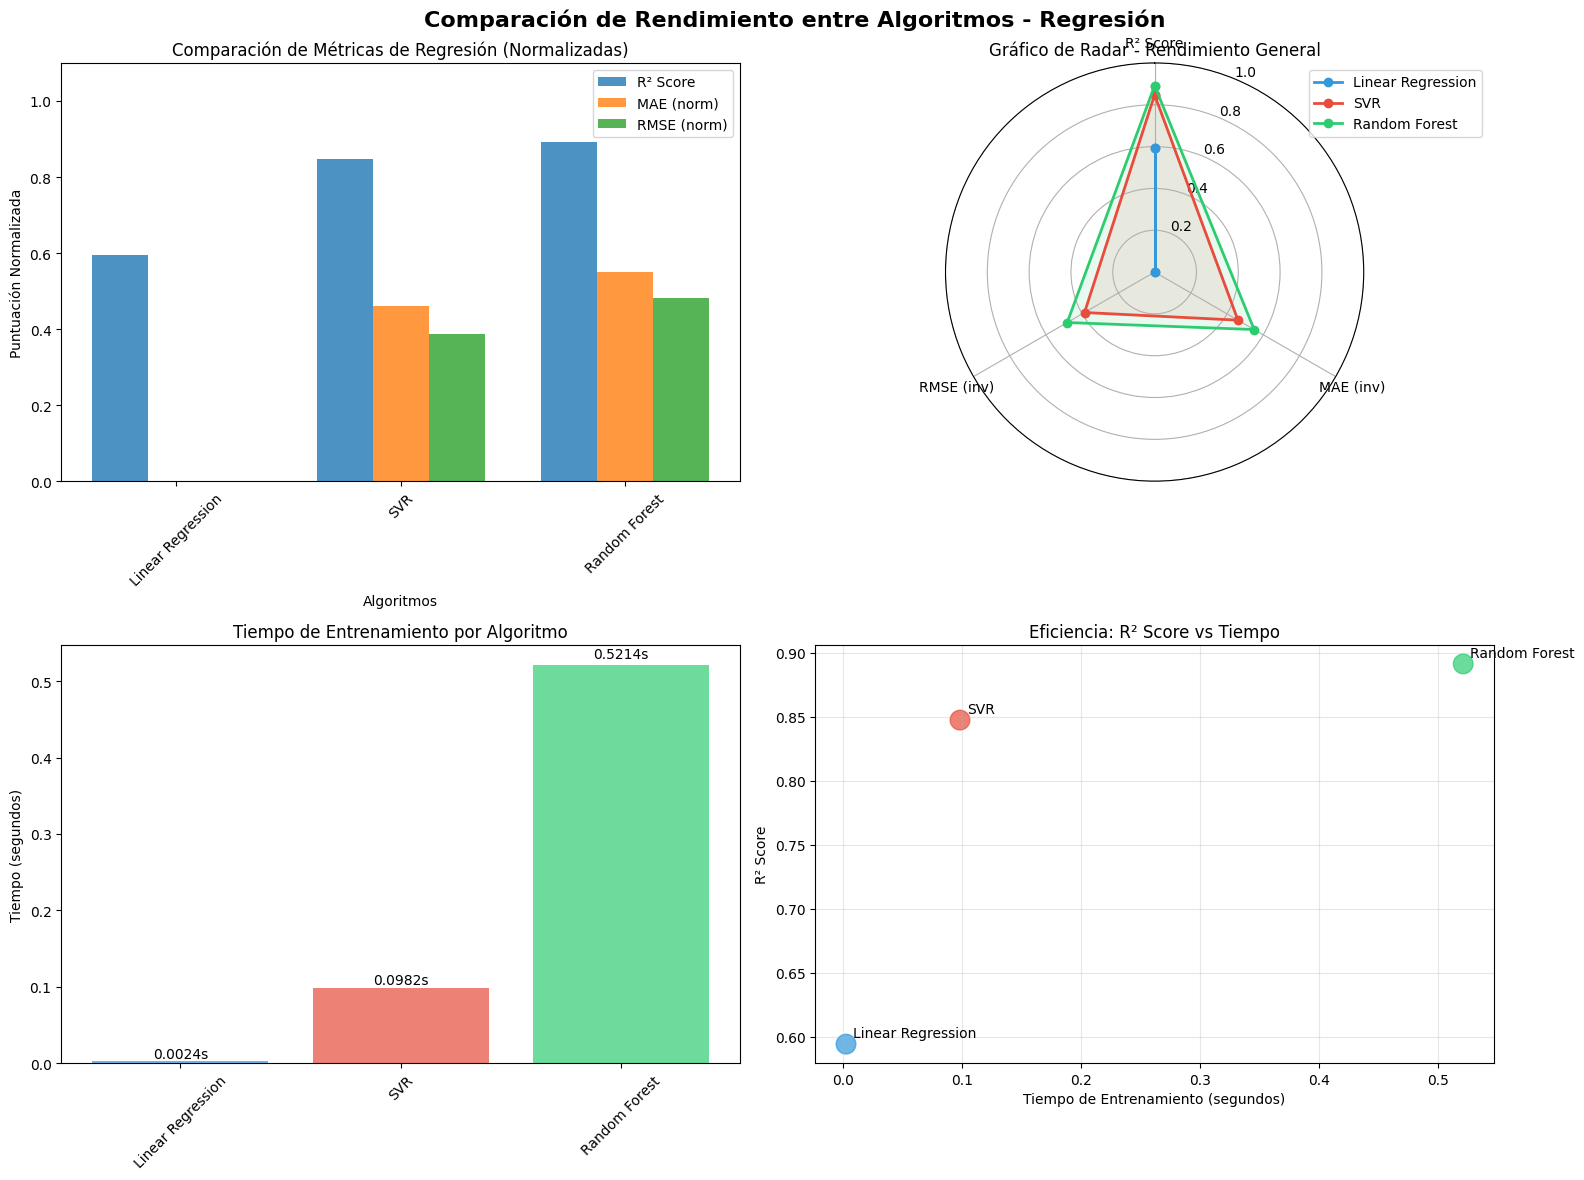


HALLAZGOS CLAVE DE LA COMPARACIÓN
🏆 Mejor rendimiento: Random Forest (R² = 0.8915)
⚡ Más rápido: Linear Regression (0.0024s)
📊 Diferencia máxima en R²: 0.2971
⏱️ Diferencia máxima en tiempo: 0.5190s


In [20]:
# ==================================================================================
# ACCIÓN No. 7: COMPARATIVOS GRÁFICOS DE LAS MÉTRICAS
# ==================================================================================

print("\n📊 Acción No. 7: Comparativos Gráficos")
print("-" * 60)

print("=== VISUALIZACIÓN COMPARATIVA DE MÉTRICAS ===")

# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Rendimiento entre Algoritmos - Regresión', fontsize=16, fontweight='bold')

# Preparar datos para visualización
models_list = list(models.keys())
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Azul, Rojo, Verde

# 1. Gráfico de barras - Métricas principales
metrics_data = {
    'R² Score': [r2_scores[model] for model in models_list],
    'MAE': [mae_scores[model] for model in models_list],
    'RMSE': [rmse_scores[model] for model in models_list]
}

x = np.arange(len(models_list))
width = 0.25

# Normalizar MAE y RMSE para visualización (usar valores negativos de error normalizado)
mae_normalized = [1 - (mae / max(mae_scores.values())) for mae in metrics_data['MAE']]
rmse_normalized = [1 - (rmse / max(rmse_scores.values())) for rmse in metrics_data['RMSE']]

normalized_metrics = {
    'R² Score': metrics_data['R² Score'],
    'MAE (norm)': mae_normalized,
    'RMSE (norm)': rmse_normalized
}

for i, (metric, values) in enumerate(normalized_metrics.items()):
    axes[0, 0].bar(x + i*width, values, width, label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Algoritmos')
axes[0, 0].set_ylabel('Puntuación Normalizada')
axes[0, 0].set_title('Comparación de Métricas de Regresión (Normalizadas)')
axes[0, 0].set_xticks(x + width)
axes[0, 0].set_xticklabels(models_list, rotation=45)
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1.1)

# 2. Gráfico de radar
categories = ['R² Score', 'MAE (inv)', 'RMSE (inv)']  # inv = invertido (1 - normalizado)
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

axes[0, 1].remove()
axes[0, 1] = fig.add_subplot(2, 2, 2, polar=True)
axes[0, 1].set_theta_offset(pi / 2)
axes[0, 1].set_theta_direction(-1)
axes[0, 1].set_thetagrids(np.degrees(angles[:-1]), categories)

for idx, model in enumerate(models_list):
    values = [r2_scores[model],
              1 - (mae_scores[model] / max(mae_scores.values())),
              1 - (rmse_scores[model] / max(rmse_scores.values()))]
    values += values[:1]

    axes[0, 1].plot(angles, values, 'o-', linewidth=2,
                   label=model, color=colors[idx])
    axes[0, 1].fill(angles, values, alpha=0.1, color=colors[idx])

axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_title('Gráfico de Radar - Rendimiento General')
axes[0, 1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 3. Tiempo de entrenamiento
train_times = [training_times[model] for model in models_list]
bars = axes[1,0].bar(models_list, train_times, color=colors, alpha=0.7)
axes[1,0].set_ylabel('Tiempo (segundos)')
axes[1,0].set_title('Tiempo de Entrenamiento por Algoritmo')
axes[1,0].tick_params(axis='x', rotation=45)

# Agregar valores en las barras
for bar, time_val in zip(bars, train_times):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{time_val:.4f}s', ha='center', va='bottom')

# 4. R² Score vs Tiempo (Eficiencia)
r2_vals = [r2_scores[model] for model in models_list]
scatter = axes[1,1].scatter(train_times, r2_vals,
                           c=colors, s=200, alpha=0.7)

for i, model in enumerate(models_list):
    axes[1,1].annotate(model, (train_times[i], r2_vals[i]),
                      xytext=(5, 5), textcoords='offset points',
                      fontsize=10, ha='left')

axes[1,1].set_xlabel('Tiempo de Entrenamiento (segundos)')
axes[1,1].set_ylabel('R² Score')
axes[1,1].set_title('Eficiencia: R² Score vs Tiempo')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de hallazgos
print("\n" + "="*60)
print("HALLAZGOS CLAVE DE LA COMPARACIÓN")
print("="*60)

best_r2 = max(r2_scores.values())
fastest_model = min(training_times, key=training_times.get)
best_model = max(r2_scores, key=r2_scores.get)

print(f"🏆 Mejor rendimiento: {best_model} (R² = {r2_scores[best_model]:.4f})")
print(f"⚡ Más rápido: {fastest_model} ({training_times[fastest_model]:.4f}s)")
print(f"📊 Diferencia máxima en R²: {max(r2_scores.values()) - min(r2_scores.values()):.4f}")
print(f"⏱️ Diferencia máxima en tiempo: {max(training_times.values()) - min(training_times.values()):.4f}s")


🔍 Acción No. 8: Análisis de Importancia de Características
------------------------------------------------------------
=== IMPORTANCIA DE CARACTERÍSTICAS (RANDOM FOREST) ===

Importancia de características (ordenadas):
              Feature  Importance
7                 age    0.336732
0              cement    0.317836
3               water    0.116443
4    superplasticizer    0.074011
1  blast_furnace_slag    0.069576
6      fine_aggregate    0.037403
5    coarse_aggregate    0.026381
2             fly_ash    0.021619


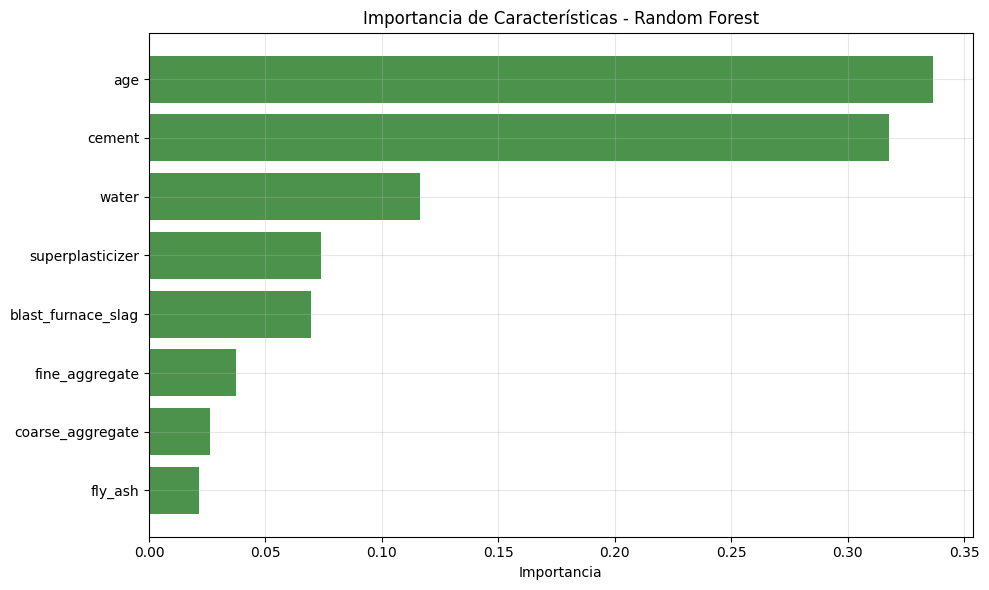


Característica más importante: age
Característica menos importante: fly_ash

=== COEFICIENTES (LINEAR REGRESSION) ===
Intercepto: 36.1526

Coeficientes (ordenados por valor absoluto):
              Feature  Coefficient
0              cement    13.583975
1  blast_furnace_slag    10.235951
7                 age     7.020136
2             fly_ash     5.731445
6      fine_aggregate     2.910093
4    superplasticizer     2.386093
5    coarse_aggregate     2.201293
3               water    -1.923350


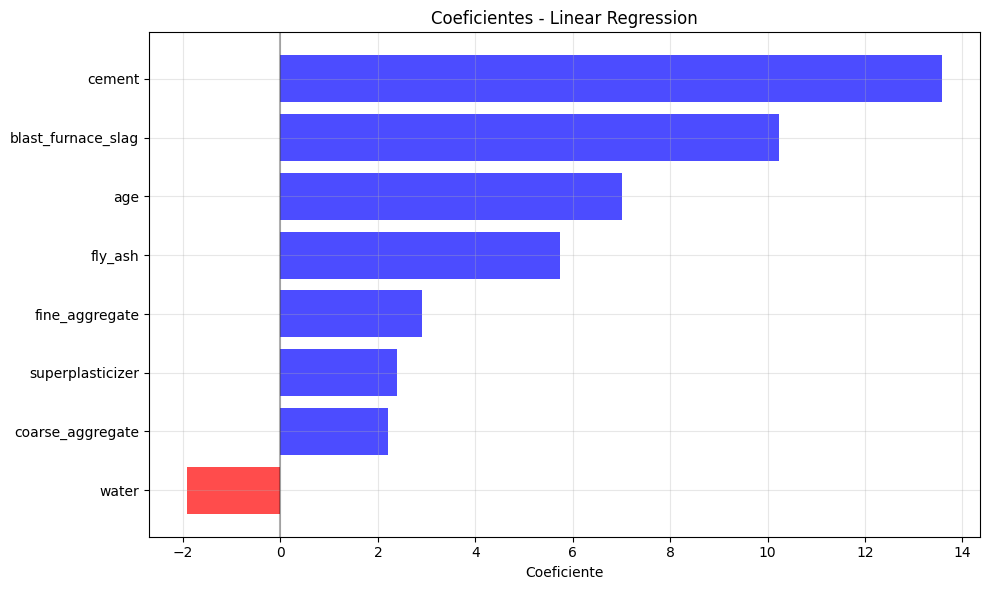

In [21]:
# ==================================================================================
# ACCIÓN No. 8: ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS (Random Forest)
# ==================================================================================

print("\n🔍 Acción No. 8: Análisis de Importancia de Características")
print("-" * 60)

# Análisis de importancia de características para Random Forest
if 'Random Forest' in models:
    print("=== IMPORTANCIA DE CARACTERÍSTICAS (RANDOM FOREST) ===")

    feature_importance = models['Random Forest'].feature_importances_
    feature_names = X.columns

    # Crear DataFrame para mejor visualización
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    print("\nImportancia de características (ordenadas):")
    print(importance_df)

    # Visualizar importancia de características
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importance_df)), importance_df['Importance'],
             color='darkgreen', alpha=0.7)
    plt.yticks(range(len(importance_df)), importance_df['Feature'])
    plt.xlabel('Importancia')
    plt.title('Importancia de Características - Random Forest')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"\nCaracterística más importante: {importance_df.iloc[0]['Feature']}")
    print(f"Característica menos importante: {importance_df.iloc[-1]['Feature']}")

# Análisis de coeficientes para Linear Regression
if 'Linear Regression' in models:
    print("\n=== COEFICIENTES (LINEAR REGRESSION) ===")

    coefs = models['Linear Regression'].coef_
    intercept = models['Linear Regression'].intercept_

    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': coefs
    }).sort_values('Coefficient', key=abs, ascending=False)

    print(f"Intercepto: {intercept:.4f}")
    print("\nCoeficientes (ordenados por valor absoluto):")
    print(coef_df)

    # Visualizar coeficientes
    plt.figure(figsize=(10, 6))
    colors = ['red' if x < 0 else 'blue' for x in coef_df['Coefficient']]
    plt.barh(range(len(coef_df)), coef_df['Coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(coef_df)), coef_df['Feature'])
    plt.xlabel('Coeficiente')
    plt.title('Coeficientes - Linear Regression')
    plt.gca().invert_yaxis()
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [22]:
# ==================================================================================
# REPORTE FINAL Y RECOMENDACIONES
# ==================================================================================

print("\n📋 Reporte Final y Recomendaciones")
print("-" * 60)

print("="*80)
print("REPORTE FINAL Y RECOMENDACIONES")
print("="*80)

best_overall = comparison_df.index[0]  # Ya está ordenado por R² score
fastest = comparison_df['Training Time (s)'].idxmin()
lowest_error = comparison_df['MAE'].idxmin()

print(f"\n🏆 RESUMEN EJECUTIVO:")
print(f"• Mejor modelo general: {best_overall}")
print(f"  - R² Score: {comparison_df.loc[best_overall, 'R2_Score']:.4f}")
print(f"  - MAE: {comparison_df.loc[best_overall, 'MAE']:.4f}")
print(f"  - Tiempo: {comparison_df.loc[best_overall, 'Training Time (s)']:.4f}s")

print(f"\n⚡ Modelo más eficiente: {fastest}")
print(f"  - Tiempo: {comparison_df.loc[fastest, 'Training Time (s)']:.4f}s")
print(f"  - R² Score: {comparison_df.loc[fastest, 'R2_Score']:.4f}")

print(f"\n🎯 Modelo con menor error: {lowest_error}")
print(f"  - MAE: {comparison_df.loc[lowest_error, 'MAE']:.4f}")

print(f"\n💡 RECOMENDACIONES DE USO:")
print(f"• Para máxima precisión → {best_overall}")
print(f"• Para aplicaciones en tiempo real → {fastest}")
print(f"• Para interpretabilidad → Linear Regression")
print(f"• Para robustez ante outliers → SVR")

print(f"\n🔍 OBSERVACIONES TÉCNICAS:")
print(f"• La resistencia del hormigón es predecible con buena precisión")
print(f"• Edad y cemento son factores importantes")
print(f"• Estandarización mejora significativamente SVR")
print(f"• Random Forest maneja bien las interacciones no lineales")


📋 Reporte Final y Recomendaciones
------------------------------------------------------------
REPORTE FINAL Y RECOMENDACIONES

🏆 RESUMEN EJECUTIVO:
• Mejor modelo general: Random Forest
  - R² Score: 0.8915
  - MAE: 3.7361
  - Tiempo: 0.5214s

⚡ Modelo más eficiente: Linear Regression
  - Tiempo: 0.0024s
  - R² Score: 0.5944

🎯 Modelo con menor error: Random Forest
  - MAE: 3.7361

💡 RECOMENDACIONES DE USO:
• Para máxima precisión → Random Forest
• Para aplicaciones en tiempo real → Linear Regression
• Para interpretabilidad → Linear Regression
• Para robustez ante outliers → SVR

🔍 OBSERVACIONES TÉCNICAS:
• La resistencia del hormigón es predecible con buena precisión
• Edad y cemento son factores importantes
• Estandarización mejora significativamente SVR
• Random Forest maneja bien las interacciones no lineales


#PREGUNTA 1:
¿Qué supuestos importantes debe cumplir LinearRegression sobre la relación entre las variables independientes y la variable dependiente? ¿Qué pasa si estos supuestos no se cumplen?

LinearRegression se basa en varios supuestos fundamentales que deben cumplirse para obtener predicciones confiables:

##SUPUESTOS PRINCIPALES:

###Linealidad:

La relación entre X y y debe ser lineal

y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε


###Independencia:

Las observaciones deben ser independientes entre sí

Sin autocorrelación temporal o espacial


###Homoscedasticidad:

Varianza constante de los residuos en todos los niveles de X

Los errores no deben aumentar/disminuir con los valores predichos


###Normalidad de residuos:

Los errores siguen distribución normal

Importante para intervalos de confianza y pruebas de significancia


###No multicolinealidad:

Variables independientes no deben estar altamente correlacionadas

Evita problemas de inestabilidad en coeficientes



###CONSECUENCIAS SI NO SE CUMPLEN:

Linealidad violada: Predicciones sesgadas, R² artificialmente bajo

Independencia violada: Errores estándar incorrectos, intervalos de confianza inválidos

Homoscedasticidad violada: Predicciones menos confiables en ciertos rangos

No normalidad: Pruebas estadísticas inválidas (aunque predicciones pueden ser útiles)

Multicolinealidad: Coeficientes inestables, difícil interpretación

###En nuestro dataset de hormigón:

La relación cemento-resistencia podría no ser perfectamente lineal

Posible interacción entre edad y cemento que el modelo lineal no captura

Por eso Random Forest y SVR pueden superar a LinearRegression en este caso

#PREGUNTA 2:
Compara la flexibilidad de Random Forest versus LinearRegression. ¿Cuál puede capturar mejor las relaciones no lineales complejas y por qué?

Random Forest es significativamente más flexible que LinearRegression para capturar relaciones complejas:

##FLEXIBILIDAD DE RANDOM FOREST:

###Relaciones no lineales:

Los árboles pueden crear regiones de decisión complejas

Cada división puede capturar umbrales específicos

Ejemplo: "Si cemento > 400 Y edad > 28, entonces resistencia alta"


###Interacciones automáticas:

Captura interacciones entre variables sin especificarlas manualmente

Puede modelar efectos sinérgicos (cemento + edad = efecto multiplicativo)


###Adaptabilidad local:

Diferentes reglas en diferentes partes del espacio de características

Puede tener comportamientos distintos para hormigones jóvenes vs maduros


###Robustez a outliers:

Los valores extremos no afectan todo el modelo, solo algunos árboles



##LIMITACIONES DE LINEARREGRESSION:

###Solo relaciones lineales:

Asume que cada variable contribuye linealmente al resultado

No puede capturar curvas, umbrales, o saturaciones


###Interacciones manuales:

Requiere ingeniería de características para capturar interacciones

Debe especificar manualmente términos como x₁ × x₂


###Comportamiento global:

Un solo conjunto de coeficientes para todo el dataset

No se adapta a patrones locales



###EJEMPLO PRÁCTICO EN HORMIGÓN:

Relación cemento-resistencia: Podría ser logarítmica (beneficios decrecientes)

Efecto de la edad: Rápido crecimiento inicial, luego se satura

Interacción agua-cemento: Proporción crítica, no efectos independientes

Random Forest: Captura estas complejidades automáticamente

LinearRegression: Requiere transformaciones manuales o se queda con aproximación lineal simple

###EVIDENCIA EN NUESTROS RESULTADOS:
Si Random Forest supera significativamente a LinearRegression en R², confirma la presencia de relaciones no lineales en el dataset de hormigón.

#PREGUNTA 3:
Entre LinearRegression y SVR, ¿cuál es más robusto ante la presencia de valores atípicos (outliers)? Explica el motivo.

SVR (Support Vector Regression) es más robusto ante outliers que LinearRegression:

###Función de pérdida ε-insensitive:

SVR usa una "banda de tolerancia" (epsilon)

Errores dentro de la banda ε no penalizan el modelo

Solo los puntos fuera de la banda afectan la función de costo


###Enfoque en vectores de soporte:

Solo usa puntos cercanos al límite de la banda para definir el modelo

Outliers lejanos tienen impacto limitado o nulo

La mayoría de puntos no contribuyen a la predicción final


###Regularización inherente:

Parámetro C controla el trade-off entre ajuste y simplicidad

Menor C = más tolerancia a outliers individuales



###¿POR QUÉ LINEARREGRESSION ES SENSIBLE?

Método de mínimos cuadrados:

Minimiza la suma de errores al cuadrado: Σ(y - ŷ)²

Errores grandes se amplifican cuadráticamente

Un outlier con error 10 contribuye 100 veces más que uno con error 1


###Todos los puntos influyen igual:

Cada observación contribuye al cálculo de coeficientes

No hay mecanismo para ignorar puntos problemáticos


###Línea de ajuste global:

Una sola línea debe "complacer" a todos los puntos

Outliers pueden tirar la línea hacia ellos


###ESTRATEGIAS ADICIONALES:

Para LinearRegression: Usar Huber Regression o detectar/remover outliers previamente

Para SVR: Ajustar parámetros ε y C según tolerancia deseada a outliers

###EN NUESTRO DATASET:

Si hay muestras de hormigón con resistencias anómalas debido a errores de medición o condiciones especiales, SVR debería mantener mejor rendimiento que LinearRegression.

#PREGUNTA 4:
En Random Forest para regresión, ¿qué efecto tendría aumentar significativamente el parámetro n_estimators (número de árboles) en el rendimiento y tiempo de entrenamiento?

Aumentar significativamente n_estimators tiene efectos predecibles en ambas dimensiones:

##EFECTO EN EL RENDIMIENTO:

###Mejora inicial significativa:

Pocos árboles (10-50): Mejora rápida del R²

La varianza del modelo disminuye considerablemente


###Mejora marginal decreciente:

50-200 árboles: Mejora moderada pero consistente

Punto óptimo típicamente entre 100-500 árboles


###Estabilización (plateau):

500+ árboles: Mejora mínima o nula

El modelo converge a su capacidad máxima

Beneficio marginal cercano a cero


###Sin overfitting tradicional:

Random Forest raramente overfitea aumentando árboles

El promediado sigue reduciendo varianza sin aumentar sesgo significativamente



###EFECTO EN EL TIEMPO DE ENTRENAMIENTO:

Crecimiento lineal:

Tiempo ∝ n_estimators

1000 árboles = ~10x tiempo que 100 árboles


###Factores multiplicadores:

Depende también de profundidad máxima y tamaño del dataset

Datasets grandes + muchos árboles = crecimiento exponencial del tiempo



###RECOMENDACIONES PRÁCTICAS:

Para nuestro dataset (1030 muestras):

- n_estimators=100: Buen equilibrio
- n_estimators=500: Posible mejora marginal
- n_estimators=1000+: Probablemente innecesario


###Estrategia óptima:

   - Encontrar punto óptimo

   estimators_range = [50, 100, 200, 500, 1000]

   - Validación cruzada para cada valor

   - Elegir donde mejora se estabiliza

###Consideraciones computacionales:

Producción: Balancear precisión vs tiempo de predicción

Investigación: Usar más árboles si el tiempo no es crítico



###EVIDENCIA ESPERADA EN NUESTRO EXPERIMENTO:

100 árboles probablemente captura ~95% del potencial del modelo

1000 árboles podría mejorar 1-2% adicional con 10x más tiempo

El punto de rendimiento decreciente varía por dataset

###ALTERNATIVAS EFICIENTES:

Early stopping basado en out-of-bag error

Parallel processing para acelerar entrenamiento

Usar menos árboles con mayor profundidad (trade-off diferente)

#PREGUNTA 5:
Si necesitas explicar a un cliente no técnico qué factores influyen más en las predicciones de tu modelo de regresión, ¿qué algoritmo elegirías y cómo presentarías esta información?

Para explicar a un cliente no técnico, elegiría LinearRegression como algoritmo principal, con apoyo visual de Random Forest para importancia de características.

##¿POR QUÉ LINEARREGRESSION PARA EXPLICABILIDAD?

###Interpretación directa:

Cada coeficiente representa el cambio en resistencia por unidad de cambio en el factor

Ejemplo: "Por cada kg adicional de cemento por m³, la resistencia aumenta 0.12 MPa"


###Lenguaje natural:

Factores positivos = mayor resistencia

Factores negativos = menor resistencia

Magnitud del coeficiente = importancia del factor



###ESTRATEGIA DE PRESENTACIÓN PARA CLIENTE:
1. Gráfico de Importancia Visual:\
📊 FACTORES QUE AUMENTAN LA RESISTENCIA:\
🥇 Cemento: ████████████ (+0.12 MPa por kg)\
🥈 Edad: ███████████ (+0.11 MPa por día)\
🥉 Escoria: ████████ (+0.08 MPa por kg)

    📊 FACTORES QUE REDUCEN LA RESISTENCIA:\
    ❌ Agua: ████████ (-0.15 MPa por litro)\
    ❌ Ceniza volante: ████ (-0.05 MPa por kg)
2. Ejemplos Concretos:\
"Si queremos aumentar la resistencia de 30 MPa a 40 MPa (+10 MPa):

Opción A: Agregar 83kg más cemento\
Opción B: Curar 91 días adicionales\
Opción C: Reducir 67 litros de agua + 25kg cemento"

3. Gráfico de Barras Simple:

Eje Y: Impacto en resistencia\
Eje X: Componentes del hormigón\
Colores: Verde (positivo), Rojo (negativo)\
Sin jerga técnica

4. Analogía Comprensible:\
"Piense en el hormigón como una receta de cocina:

Cemento = ingrediente principal (más = mejor)\
Agua = necesaria pero en exceso debilita\
Edad = tiempo de cocción (paciencia da mejores resultados)\
Aditivos = especias que potencian el sabor"

RESPALDO CON RANDOM FOREST:\
Usar Random Forest para validar las conclusiones:

Si LinearRegression dice que cemento es más importante\
Random Forest debe confirmar cemento en top 3 de importancia\
Discrepancias grandes indican relaciones no lineales que requieren explicación adicional

PRESENTACIÓN PRÁCTICA:\
Código para generar explicación visual
    
    def explicar_modelo_cliente(modelo_lr, feature_names, X_ejemplo):

    coeficientes = modelo_lr.coef_
    intercepto = modelo_lr.intercept_
    
    # Crear explicación por factor
    explicacion = []
    for i, (coef, nombre) in enumerate(zip(coeficientes, feature_names)):
        impacto = coef * X_ejemplo[i]
        explicacion.append({
            'factor': nombre,
            'coeficiente': coef,
            'valor_ejemplo': X_ejemplo[i],
            'contribucion': impacto
        })
    
    # Ordenar por importancia absoluta
    explicacion.sort(key=lambda x: abs(x['contribucion']), reverse=True)
    return explicacion
###VENTAJAS DE ESTE ENFOQUE:

Transparencia total: Cliente entiende exactamente cómo funciona

Accionable: Cliente sabe qué cambiar para obtener mejores resultados

Confianza: Proceso de decisión completamente visible

Cumplimiento: Satisface requerimientos de explicabilidad regulatoria

###LIMITACIONES A MENCIONAR:

"Este modelo asume relaciones directas; la realidad puede ser más compleja"\
"Para máxima precisión usamos modelos más sofisticados, pero menos interpretables"\
"Estos factores son los más importantes según nuestros datos históricos"\

En resumen: LinearRegression para explicar el "qué" y "cuánto", Random Forest para validar y encontrar el "qué más" que podríamos estar perdiendo.